In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [7]:
df=pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv')
df.head(20)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
5,4.7,8.0,128.0,5.80,35,12.0,5000,140300
6,4.4,8.0,128.0,6.70,64,5.0,4700,29999
7,4.5,8.0,128.0,6.70,48,12.0,4700,47999
8,4.4,4.0,128.0,6.53,48,2.0,4020,16490
9,4.5,8.0,256.0,6.18,35,5.0,3800,22999


In [8]:
df.drop(columns=['Ratings'],axis=1,inplace=True)

In [9]:
df.head(20)

,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.0,128.0,6.00,48,13.0,4000,24999
1,6.0,64.0,4.50,48,12.0,4000,15999
2,4.0,4.0,4.50,64,16.0,4000,15000
3,6.0,64.0,6.40,48,15.0,3800,18999
4,6.0,128.0,6.18,35,15.0,3800,18999
5,8.0,128.0,5.80,35,12.0,5000,140300
6,8.0,128.0,6.70,64,5.0,4700,29999
7,8.0,128.0,6.70,48,12.0,4700,47999
8,4.0,128.0,6.53,48,2.0,4020,16490
9,8.0,256.0,6.18,35,5.0,3800,22999


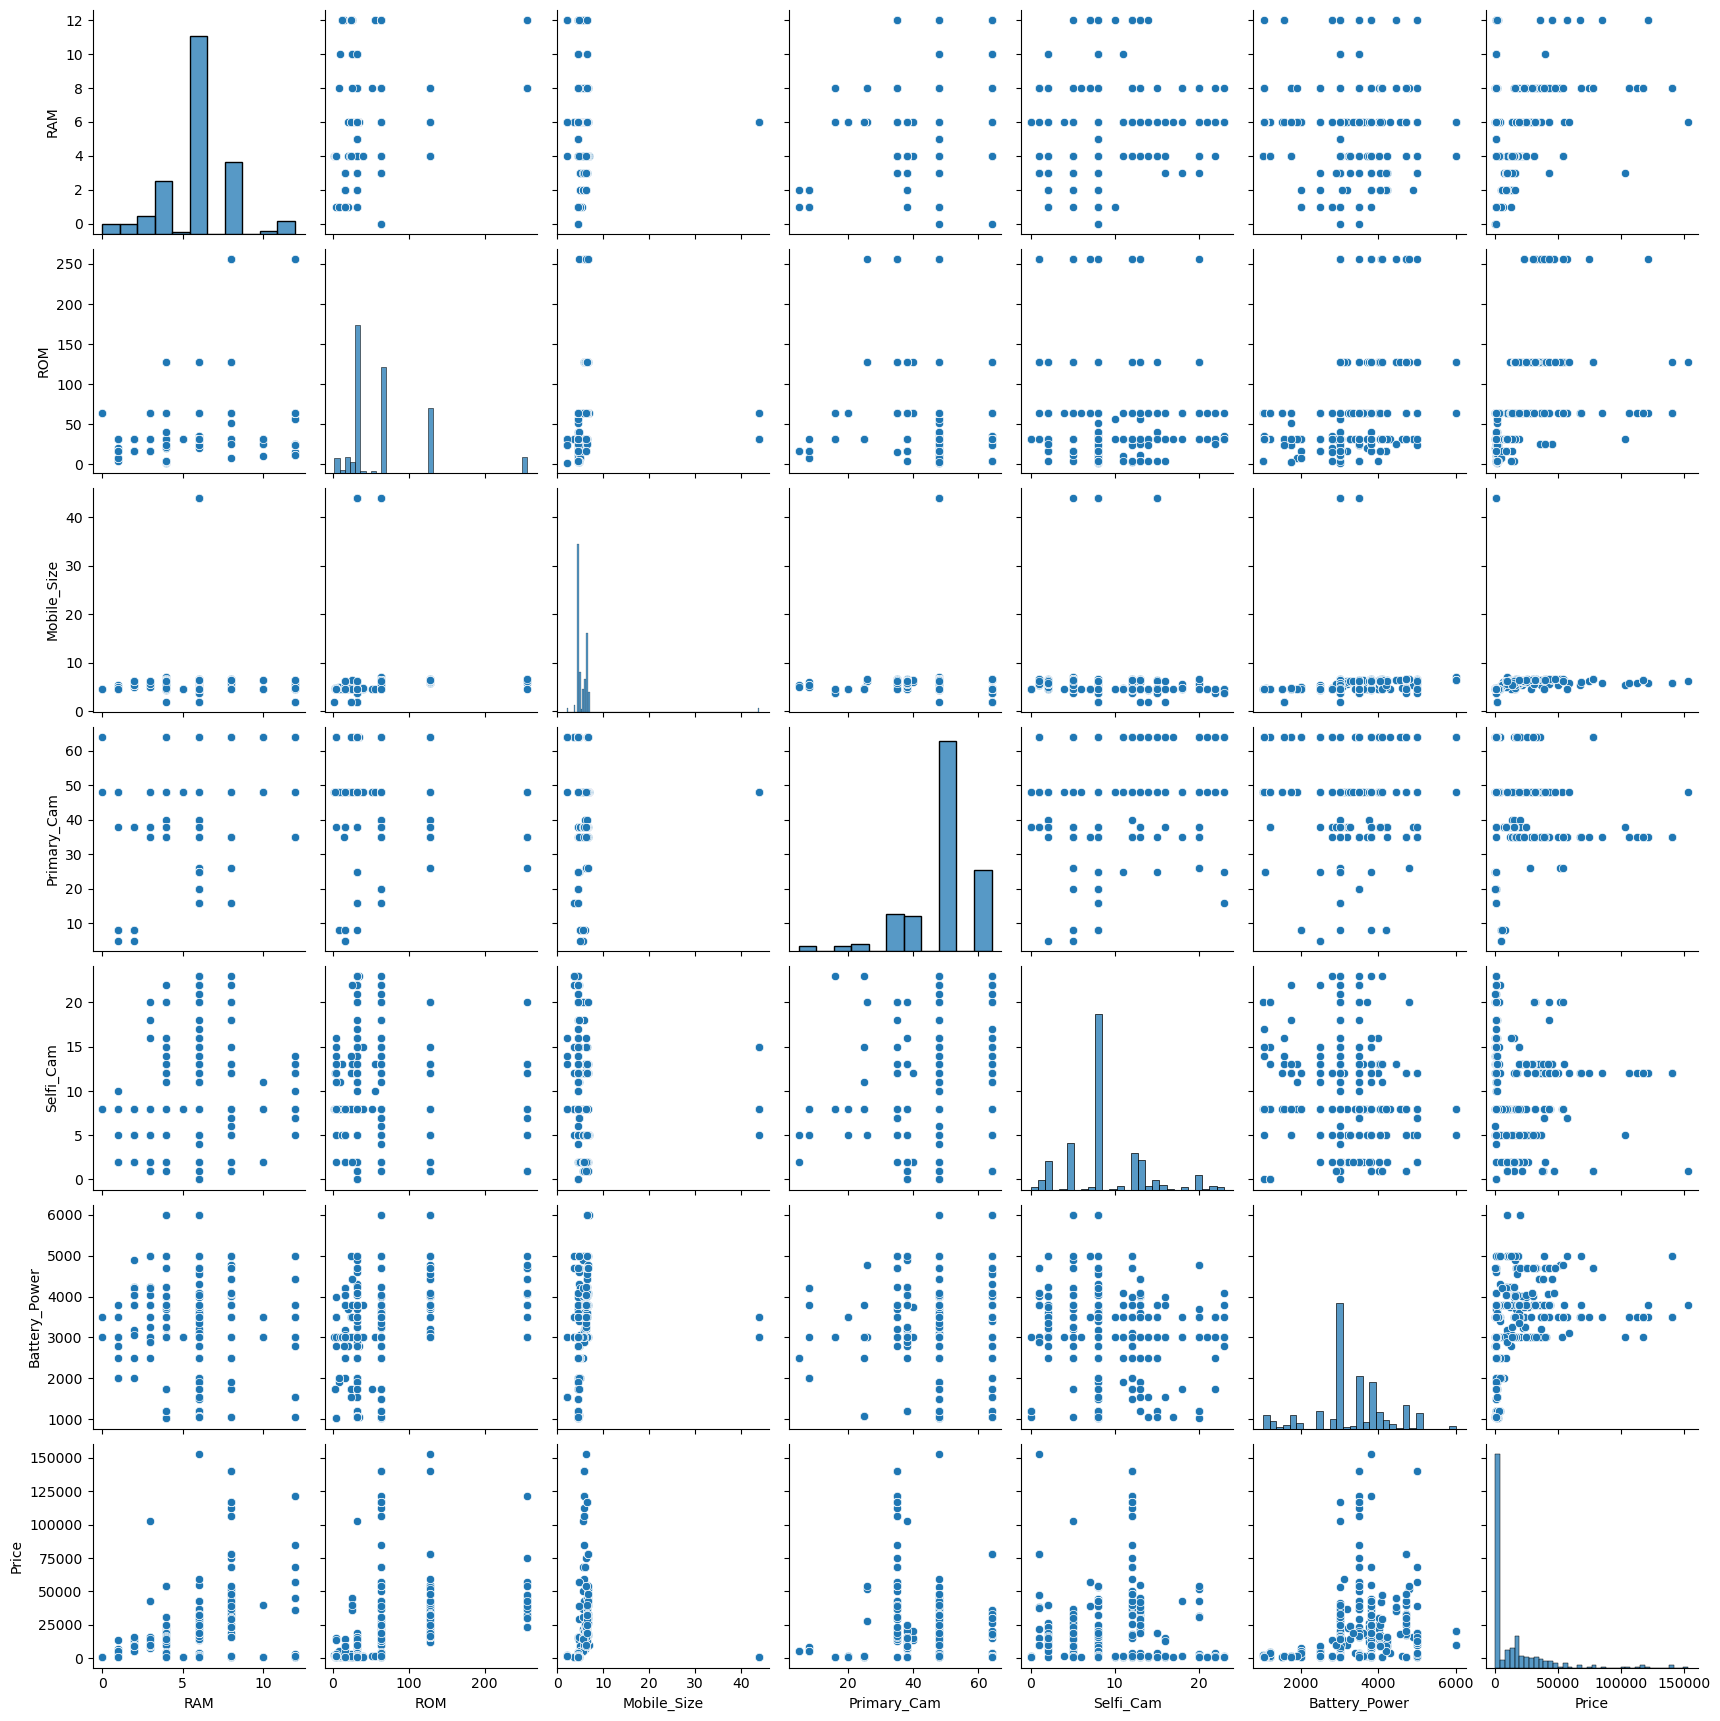

In [10]:
sns.pairplot(df)

In [11]:
df.isnull().sum()

RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [12]:
df.corr()

,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
RAM,1.000000,0.332631,0.008619,0.173748,0.195685,0.032596,0.298383
ROM,0.332631,1.000000,0.106085,-0.067326,-0.044190,0.412475,0.474928
Mobile_Size,0.008619,0.106085,1.000000,-0.053856,-0.020676,0.131125,0.084689
Primary_Cam,0.173748,-0.067326,-0.053856,1.000000,0.121800,-0.059803,-0.223997
Selfi_Cam,0.195685,-0.044190,-0.020676,0.121800,1.000000,-0.092986,0.015791
Battery_Power,0.032596,0.412475,0.131125,-0.059803,-0.092986,1.000000,0.369221
Price,0.298383,0.474928,0.084689,-0.223997,0.015791,0.369221,1.000000


In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
X.head(10)

,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,4.0,128.0,6.00,48,13.0,4000
1,6.0,64.0,4.50,48,12.0,4000
2,4.0,4.0,4.50,64,16.0,4000
3,6.0,64.0,6.40,48,15.0,3800
4,6.0,128.0,6.18,35,15.0,3800
5,8.0,128.0,5.80,35,12.0,5000
6,8.0,128.0,6.70,64,5.0,4700
7,8.0,128.0,6.70,48,12.0,4700
8,4.0,128.0,6.53,48,2.0,4020
9,8.0,256.0,6.18,35,5.0,3800


In [15]:
y.head()

0    24999
1    15999
2    15000
3    18999
4    18999
Name: Price, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
X_train.head()

,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
181,6.0,32.0,4.50,48,8.0,3000
411,6.0,128.0,6.67,48,8.0,3800
367,4.0,64.0,6.26,35,5.0,3000
417,8.0,64.0,5.80,35,12.0,5000
158,12.0,24.0,4.50,48,8.0,3500


In [18]:
X_test.head()

,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
697,6.0,32.0,4.54,25,11.0,3800
296,6.0,64.0,4.50,48,8.0,3000
227,6.0,64.0,4.50,48,8.0,3000
336,6.0,64.0,6.50,48,8.0,5000
537,6.0,32.0,4.54,48,20.0,3000


In [19]:
#Stabdraisezed
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

307007497.9396798
11021.662687873426
17521.629431639052


In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.37853011861699404

In [26]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.35940796842059386

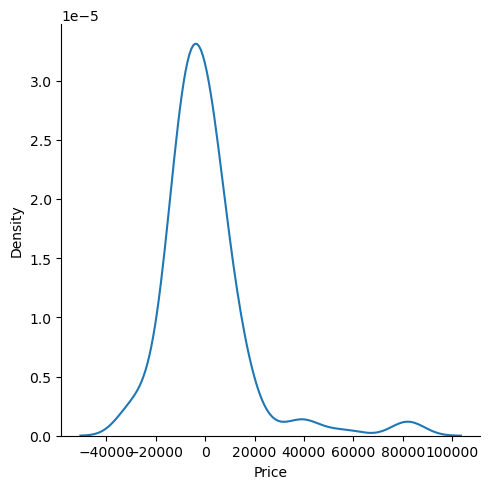

In [27]:
sns.displot((y_test-y_pred),kind='kde')


In [28]:
lr.predict(scaler.transform([[8,128,7.00,48,12,5000]]))

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([37837.70899804])